Model Accuracy: 0.3323

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.72      0.46      4068
           1       0.33      0.15      0.21      3982
           2       0.32      0.12      0.17      3950

    accuracy                           0.33     12000
   macro avg       0.33      0.33      0.28     12000
weighted avg       0.33      0.33      0.28     12000



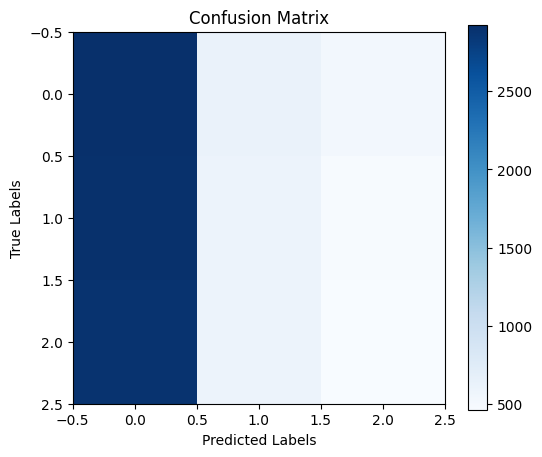

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = {
    "Prevalence Rate": np.random.randn(60000),
    "Incidence Rate": np.random.randn(60000),
    "Cluster": np.random.choice([0, 1, 2], 60000)  # Assuming 3 clusters as in your dataset
}
df = pd.DataFrame(data)

X = df[['Prevalence Rate', 'Incidence Rate']]  
y = df['Cluster']  

# Step 3: Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
